# Trade Data Cleanup and Automation Project
This notebook demonstrates how I used Python, pandas, Anaconda, Jupyter Notebooks, and SQL to automate trade data processing for a Power BI dashboard.

In [1]:
import pandas as pd
import numpy as np

In [2]:
import numpy as np
np.__version__


'2.1.3'

In [3]:
df = pd.read_excel("Python Excel Trades.xlsx")
df.head()


FileNotFoundError: [Errno 2] No such file or directory: 'Python Excel Trades.xlsx'

In [4]:
df = pd.read_excel(r"C:\Users\sarah\Downloads\Python Excel Trades_Cleaned Trades.xlsx")


In [5]:
df.head()


,Trade ID,Notional,Trade date,Settlement Date,Product Type
0,10489,1000000,29-10-2025,2025-10-31,IRD
1,17394,-5000000,30-10-2025,2025-11-02,IRD
2,45537,2500000,03-11-2025,2025-11-05,IRD
3,87654,60000000,21-11-2025,2025-11-23,IRD
4,34568,4000000,29-10-2025,2025-11-01,IRD


In [6]:
df["Product Type"].unique()


array(['IRD'], dtype=object)

In [7]:
df["Product Type"].value_counts()


Product Type
IRD    5
Name: count, dtype: int64

In [8]:
df.groupby("Product Type")["Notional"].sum()


Product Type
IRD    62500000
Name: Notional, dtype: int64

In [9]:
df["Trade date"] = pd.to_datetime(df["Trade date"], errors="coerce")  # if not already done
df["Trade date"].value_counts().sort_index()


C:\Users\sarah\AppData\Local\Temp\ipykernel_35872\2281966441.py:1: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df["Trade date"] = pd.to_datetime(df["Trade date"], errors="coerce")  # if not already done


Trade date
2025-10-29    2
2025-10-30    1
2025-11-03    1
2025-11-21    1
Name: count, dtype: int64

In [10]:
df["Trade date"] = pd.to_datetime(df["Trade date"], format="%d-%m-%Y", errors="coerce")


In [11]:
df

,Trade ID,Notional,Trade date,Settlement Date,Product Type
0,10489,1000000,2025-10-29,2025-10-31,IRD
1,17394,-5000000,2025-10-30,2025-11-02,IRD
2,45537,2500000,2025-11-03,2025-11-05,IRD
3,87654,60000000,2025-11-21,2025-11-23,IRD
4,34568,4000000,2025-10-29,2025-11-01,IRD


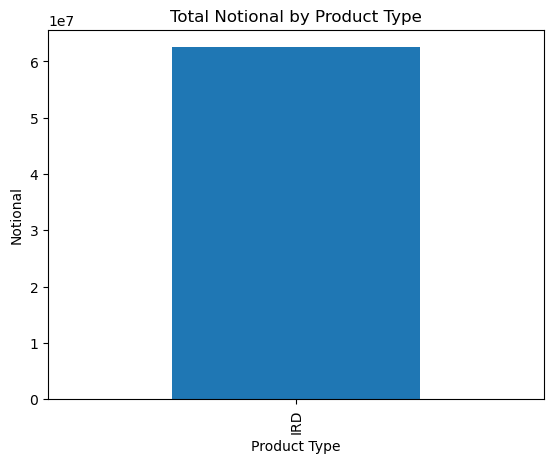

In [12]:
import matplotlib.pyplot as plt

df.groupby("Product Type")["Notional"].sum().plot(kind="bar")
plt.title("Total Notional by Product Type")
plt.ylabel("Notional")
plt.xlabel("Product Type")
plt.show()


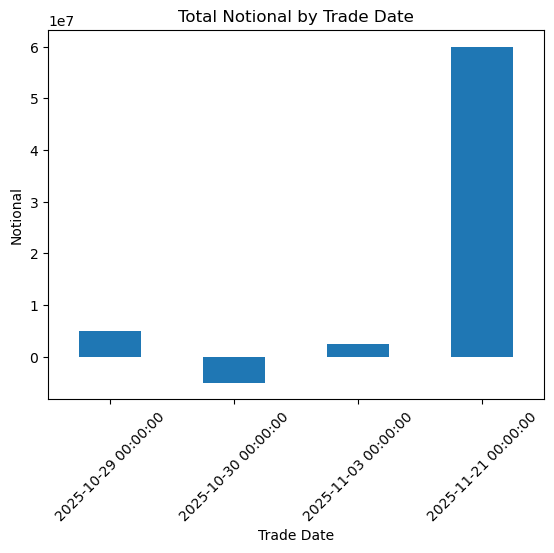

In [13]:
df.groupby("Trade date")["Notional"].sum().plot(kind="bar")
plt.title("Total Notional by Trade Date")
plt.ylabel("Notional")
plt.xlabel("Trade Date")
plt.xticks(rotation=45)
plt.show()
